In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy,copy

from z3 import *
import grilops
import grilops.regions
from grilops.shapes import Shape, ShapeConstrainer
from grilops.geometry import Point, Vector

In [2]:
# 
url='https://www.janestreet.com/puzzles/may-2014/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
print("Puzzle")
print("~~~~~~")
print(" ".join(y[8:10]))

Puzzle
~~~~~~
Add square tiles to the 12-by-12 grid so that the total points in each row and each column matches the corresponding value outside the grid. A tile can have any side length (e.g., 1-by-1, 2-by-2, 3-by-3, etc.)


### Puzzle details
<img src="https://www.janestreet.com/puzzles/TileAndTrouble.png" width="350" >


Solved in 1.805145025253296 seconds


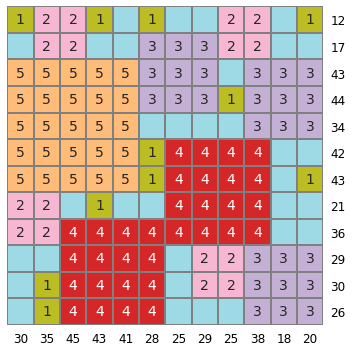

In [57]:
#row_tot = [8,8,20,17,25,25,11]
#col_tot = [15,13,10,21,20,18,17]
#size = 7
#nums = 4

row_tot = [12,17,43,44,34,42,43,21,36,29,30,26]
col_tot = [30,35,45,43,41,28,25,29,25,38,18,20]
size = 12
nums = 5

start = time.time()

X = [[Int("s%d%d" % (i+1,j+1)) for j in range (size)] for i in range (size)]

s = Solver()
s += [And(X[i][j]>=0,X[i][j]<=nums) for j in range (size) for i in range(size)]


for n in range(size):
    s += Sum([X[n][j] for j  in range(size)]) == row_tot[n]
    s += Sum([X[i][n] for i  in range(size)]) == col_tot[n]
    

for i,j in itertools.product(range(size),range(size)):

        
    if i == 1 :
        s += [Implies(X[i-1][j] == n,X[i][j]==n) for n in range(nums+1) if n > 1]
    elif i > 1 :   
        s += [Implies(And(X[i-1][j]==n,X[i-2][j] != n),X[i][j]==n) for n in range(nums+1) if n > 1 ]    
    if j == 1 :
        s += [Implies(X[i][j-1] == n,X[i][j]==n) for n in range(nums+1) if n > 1]
    elif j > 1 :   
        s += [Implies(And(X[i][j-1]==n,X[i][j-2]!= n),X[i][j]==n) for n in range(nums+1) if n > 1 ]   

    if i == 2:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n),X[i][j]==n) for n in range(nums+1) if n > 2 ]    
    elif i > 2 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] != n),X[i][j]==n) for n in range(nums+1) if n > 2 ]    
    if j == 2:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n),X[i][j]==n,X[i][j]==n) for n in range(nums+1) if n > 2 ]    
    elif j > 2 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] != n),X[i][j]==n) for n in range(nums+1) if n > 2 ]       
    
    if i == 3:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n),X[i][j]==n) for n in range(nums+1) if n > 3 ]    
    elif i > 3 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] != n),X[i][j]==n) for n in range(nums+1) if n > 3 ]    
    if j == 3:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n ,X[i][j-3]==n),X[i][j]==n) for n in range(nums+1) if n > 3 ]    
    elif j > 3 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3]==n, X[i][j-4] != n),X[i][j]==n) for n in range(nums+1) if n > 3 ]       
    
    if i == 4:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] == n),X[i][j]==n) for n in range(nums+1) if n > 4 ]    
    elif i > 4 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-5][j] != n),X[i][j]==n) for n in range(nums+1) if n > 4 ]    
    if j == 4:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n ,X[i][j-3]==n,X[i][j-4]==n),X[i][j]==n) for n in range(nums+1) if n > 4 ]    
    elif j > 4 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3]==n,X[i][j-4]==n, X[i][j-5] != n),X[i][j]==n) for n in range(nums+1) if n > 4 ]       
        

if s.check() == sat:
    print("Solved in {} seconds".format(time.time()-start))
    m = s.model()
    out = np.array([ [ m.evaluate(X[i][j]).as_long() for j in range(size) ] for i in range(size) ])
    x = np.copy(out)
    x = x.astype('int').astype('str')
    x[x=="0"] = ""
    fig,ax = plt.subplots(1,1,figsize=(5,5))    
    ax =sns.heatmap(out,annot=x,cbar=False,center=3,cmap="tab20_r",fmt="",linewidths=1,linecolor="grey",annot_kws={"size":14},
                    xticklabels=col_tot, yticklabels=row_tot)
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontsize =12)
    plt.yticks(rotation=0,fontsize =12)
    plt.tight_layout()
    plt.show()   
     
else:
    print("No solution in {} seconds".format(time.time()-start))

In [7]:
url='https://www.janestreet.com/puzzles/solutions/may-2014-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:8]))

Solution
~~~~~~~~
Here is the solution to May’s puzzle, Tile and Trouble.   Congratulations to Katie Rue, this month’s randomly chosen winner, and recipient of a Jane Street t-shirt!


<img src="https://www.janestreet.com/puzzles/May14_Solution.png" width="800">